# Exp 012: Test PCA

In [4]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from metrics import f_score, auc_roc
from models import KNearestNeighbors
from preprocessing import normalize_and_bias_data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

In [5]:
X = normalize_and_bias_data(x_train)

In [ ]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered, rowvar=False)  # shape (n_features, n_features)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


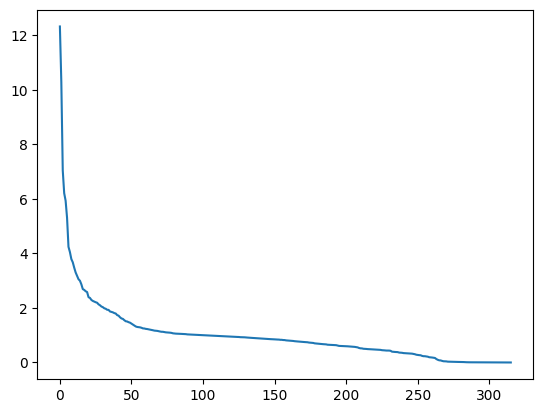

In [7]:
plt.plot(eigenvalues)

In [8]:
k = 50  # for example
W = eigenvectors[:, :k]
X_pca = X_centered @ W

print("Projected data shape:", X_pca.shape)

Projected data shape: (328135, 50)


In [35]:
knn = KNearestNeighbors(metric=f_score, use_pca=True)
num_samples = 100000
knn.hyperparameter_tuning(x_train[:num_samples], y_train[:num_samples], verbose=True)
knn.train(x_train[:num_samples], y_train[:num_samples])
predictions = knn.predict(x_train[num_samples:num_samples+5000])
print(f"F1 Score: {f_score(predictions, y_train[num_samples:num_samples+5000])}")

(90000, 10)
(10000, 321)
Processed 5% of test set
Processed 10% of test set
Processed 15% of test set
Processed 20% of test set
Processed 25% of test set
Processed 30% of test set
Processed 35% of test set
Processed 40% of test set
Processed 45% of test set
Processed 50% of test set
Processed 55% of test set
Processed 60% of test set
Processed 65% of test set
Processed 70% of test set
Processed 75% of test set
Processed 80% of test set
Processed 85% of test set
Processed 90% of test set
Processed 95% of test set
Processed 100% of test set
Evaluating k=75
Finding best threshold...
Best threshold: 0.165 with score 0.3679885673454806
Evaluating k=151
Finding best threshold...
Best threshold: 0.155 with score 0.37364864864864866
Evaluating k=301
Finding best threshold...
Best threshold: 0.16 with score 0.36892515076268173
Evaluating k=375
Finding best threshold...
Best threshold: 0.15 with score 0.3712655253440752
Evaluating k=451
Finding best threshold...
Best threshold: 0.165 with score 